In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-03 21:33:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-03 21:33:36 (96.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-06-03 21:33:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   142MB/s    in 1.1s    

2023-06-03 21:33:42 (142 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
unzip_data("10_food_classes_10_percent.zip")

In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [6]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [7]:
import tensorflow as tf
IMG_SIZE = (224, 224)

In [8]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [10]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [11]:
for images, labels in train_data_10_percent.take(1):
    print(images, labels)

tf.Tensor(
[[[[ 76.07589     39.075893    12.075892  ]
   [ 81.40275     44.402744    17.402742  ]
   [ 82.74107     45.741074    16.741072  ]
   ...
   [ 58.736607    23.736607     4.736607  ]
   [ 58.736607    23.736607     4.736607  ]
   [ 58.736607    23.736607     4.736607  ]]

  [[ 79.86607     42.86607     15.866072  ]
   [ 84.45249     47.452488    20.452488  ]
   [ 85.79465     48.794643    19.794643  ]
   ...
   [ 58.          23.           4.        ]
   [ 58.          23.           4.        ]
   [ 58.          23.           4.        ]]

  [[ 79.91964     41.96875     15.285714  ]
   [ 84.196754    46.245857    19.562819  ]
   [ 85.31696     47.683037    18.683035  ]
   ...
   [ 57.          22.           3.        ]
   [ 57.          22.           3.        ]
   [ 57.          22.           3.        ]]

  ...

  [[  7.           3.           0.        ]
   [  7.           3.           0.        ]
   [  7.           3.           0.        ]
   ...
   [123.384865   106.599

In [12]:
IMG_SIZE+(3,)

(224, 224, 3)

In [16]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=IMG_SIZE+(3,), name="input_layer")

x = base_model(inputs)

print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

print(f"Shape after GlobalAveragePooling2D(): {x.shape}")

Shape after base_model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D(): (None, 1280)


In [17]:
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

In [18]:
model_0 = tf.keras.Model(inputs, outputs)

In [19]:
model_0.compile(loss="categorical_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['accuracy'])

In [20]:
model_0_history = model_0.fit(train_data_10_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_10_percent),
                                validation_data=test_data_10_percent,
                                validation_steps=int(0.25 * len(test_data_10_percent)),
                                callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20230603-215556
Epoch 1/5
24/24 [==============================] - 21s 251ms/step - loss: 1.9056 - accuracy: 0.4053 - val_loss: 1.3048 - val_accuracy: 0.7368
Epoch 2/5
24/24 [==============================] - 4s 139ms/step - loss: 1.1077 - accuracy: 0.7587 - val_loss: 0.8544 - val_accuracy: 0.8207
Epoch 3/5
24/24 [==============================] - 5s 176ms/step - loss: 0.8004 - accuracy: 0.8227 - val_loss: 0.6927 - val_accuracy: 0.8372
Epoch 4/5
24/24 [==============================] - 5s 177ms/step - loss: 0.6448 - accuracy: 0.8547 - val_loss: 0.6042 - val_accuracy: 0.8487
Epoch 5/5
24/24 [==============================] - 5s 179ms/step - loss: 0.5571 - accuracy: 0.8853 - val_loss: 0.5647 - val_accuracy: 0.8586


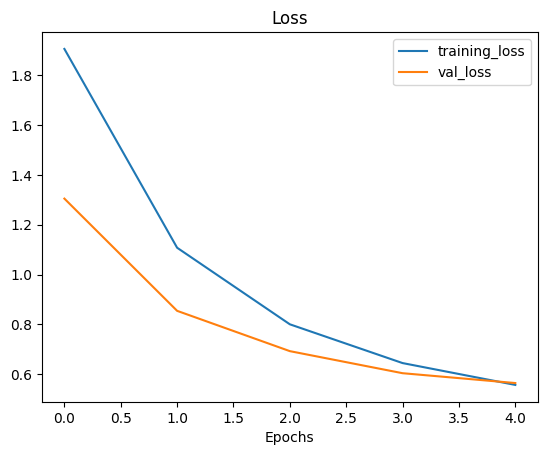

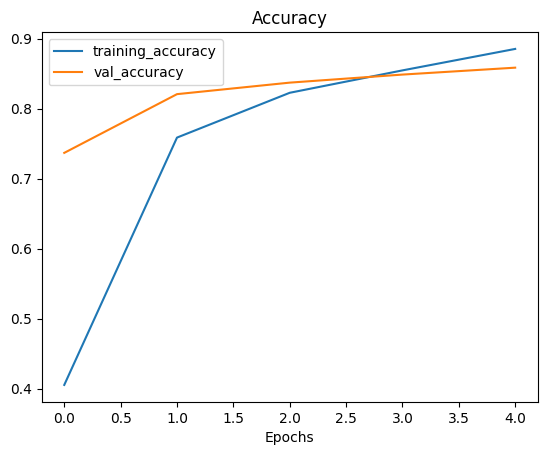

In [21]:
plot_loss_curves(model_0_history)